#### 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### MNIST 다운로드

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
print((train_input.shape, train_target.shape))
print((test_input.shape, test_target.shape))

((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))


In [6]:
# MNIST 이미지 표현
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax =axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap="gray_r")
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()

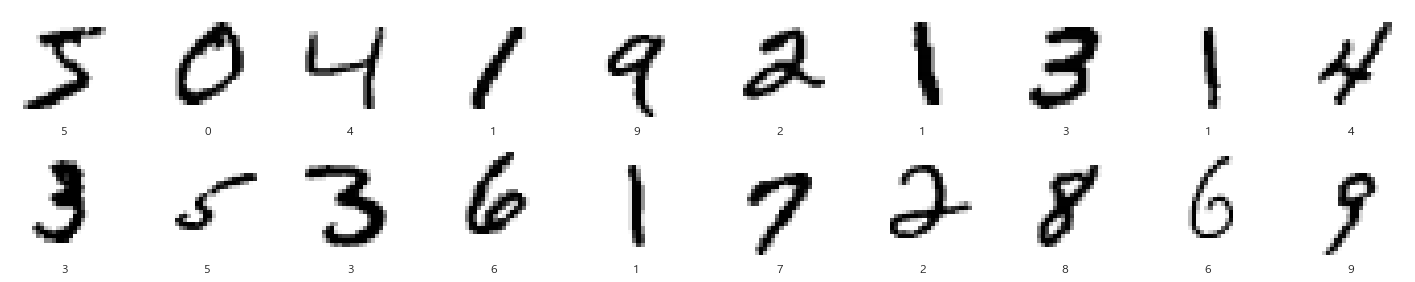

In [7]:
show_images(train_input, train_target, 2, 10)

In [8]:
model = keras.Sequential(name="ANN")
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation="relu", name="hidden"))
model.add(keras.layers.Dense(10, activation="softmax", name="softmax"))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 softmax (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 255.0 나눠서 0~1로 값 축소하는 일은 하지않음
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best_ann_model.h5",save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target), batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
590/600 [============================>.] - ETA: 0s - loss: 3.7675 - accuracy: 0.8473
Epoch 1: val_loss improved from inf to 0.78123, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 2ms/step - loss: 3.7196 - accuracy: 0.8474 - val_loss: 0.7812 - val_accuracy: 0.8547
Epoch 2/20
591/600 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.8893
Epoch 2: val_loss improved from 0.78123 to 0.51241, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.8896 - val_loss: 0.5124 - val_accuracy: 0.8930
Epoch 3/20
580/600 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.9172
Epoch 3: val_loss improved from 0.51241 to 0.35501, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.9176 - val_loss: 0.3550 - val_accuracy: 0.9202
Epoch 4/20
600/600 [========================

In [10]:
#드롭아웃 추가
model = keras.Sequential(name="ANN")
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation="relu", name="hidden"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation="softmax", name="softmax"))
model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 softmax (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 255.0 나눠서 0~1로 값 축소하는 일은 하지않음
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("./data/best_ann_model.h5",save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target), batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
596/600 [============================>.] - ETA: 0s - loss: 4.4625 - accuracy: 0.6526
Epoch 1: val_loss improved from inf to 0.77156, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 3ms/step - loss: 4.4392 - accuracy: 0.6533 - val_loss: 0.7716 - val_accuracy: 0.8292
Epoch 2/20
597/600 [============================>.] - ETA: 0s - loss: 0.8678 - accuracy: 0.7616
Epoch 2: val_loss improved from 0.77156 to 0.52642, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 3ms/step - loss: 0.8674 - accuracy: 0.7617 - val_loss: 0.5264 - val_accuracy: 0.8858
Epoch 3/20
599/600 [============================>.] - ETA: 0s - loss: 0.6692 - accuracy: 0.8154
Epoch 3: val_loss improved from 0.52642 to 0.44039, saving model to ./data\best_ann_model.h5
600/600 [==============================] - 2s 3ms/step - loss: 0.6688 - accuracy: 0.8155 - val_loss: 0.4404 - val_accuracy: 0.8990
Epoch 4/20
589/600 [========================

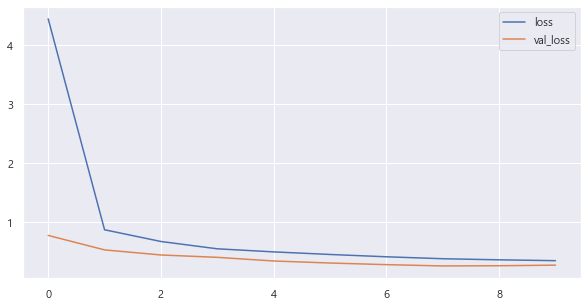

In [12]:
plot_target = ["loss", "val_loss"]
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

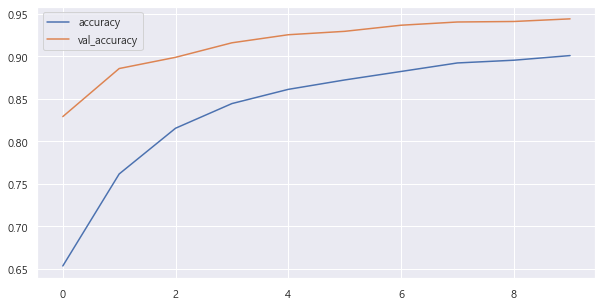

In [13]:
plot_target = ["accuracy", "val_accuracy"]
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [14]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.9406


[0.2546059191226959, 0.9405999779701233]

In [15]:
# 예측된 결과값 리스트
pred_result = model.predict(test_input)

313/313 [==============================] - 0s 780us/step


In [16]:
pred_labels = np.argmax(pred_result, axis=-1)
print(pred_labels[:10])
print(pred_labels.shape)

[7 2 1 0 4 1 4 9 5 9]
(10000,)


#### 예측 실패한 이미지 파악

In [17]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

594

In [18]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

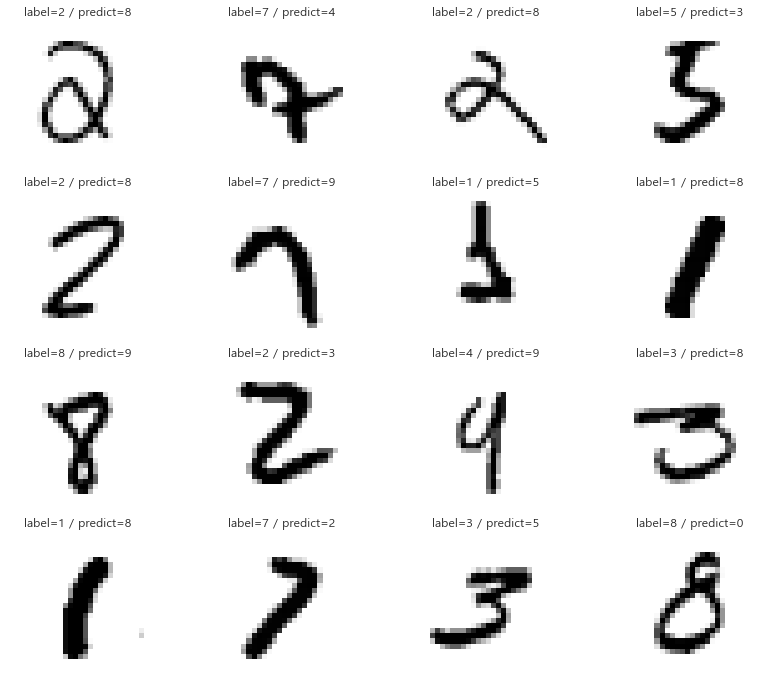

In [19]:
# 예측 실패한 이미지 확인
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(test_input[n].reshape(28,28), cmap="gray_r", interpolation="nearest")
    plt.title(f"label={test_target[n]} / predict={pred_labels[n]}")
    plt.axis("off")
plt.show()